# Boosting and Classification

#### -Akshay Ratnawat

In [215]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


### 1. Data Processing

##### a,b) Importing the data and adding the column names

In [98]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                   header = None, names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                                           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                                            'hours_per_week', 'native_country', 'salary'])
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### c) Check your dataframe shape to verify that you have the correct # of rows and columns

In [99]:
data.shape

(32561, 15)

##### d) Drop the 3rd column from the data fnlwgt

In [100]:
data = data[['age', 'workclass', 'education', 'education_num', 'marital_status','occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
            'hours_per_week', 'native_country', 'salary']]
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [101]:
# Checking the data types and Null values if any
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


Changing the salary column to Binary variable

##### f) Make the following changes to the "salary" column:
"<=50K" should become 0 

">50K" should become 1

In [102]:
data['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [103]:
#data['salary'] = np.where(data['salary'] == ' <=50K', 0, 1)
data['salary'] = data['salary'].replace({" >50K": 1,
                                              " <=50K":0})
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


##### g) Create your X dataframe (just your predictors). It should include every feature except for the target variable which is "salary".

In [104]:
X = data.drop('salary', axis = 1)
X.shape

(32561, 13)

##### h) Create your y dataframe (just your target variable). It should only be "salary".

In [105]:
y = data['salary']
y.shape

(32561,)

In [96]:
y.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

##### i) Doing One Hot Encoding
(Note: Decision Trees do not require One Hot Encoding)

In [110]:
X_encoded = pd.get_dummies(X)
X_encoded.shape
X_encoded.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


##### j) Split data into train / test set using an 70/30 split. Verify that you have the same number of columns in your X_train and X_test.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42)

print("Size of X_train is: ", X_train.shape)
print("Size of y_train is: ", y_train.shape)

print("Size of X_test is: ", X_test.shape)
print("Size of y_test is: ", y_test.shape)

Size of X_train is:  (22792, 107)
Size of y_train is:  (22792,)
Size of X_test is:  (9769, 107)
Size of y_test is:  (9769,)


## 2. Random Forest Classifier - Base Model:

##### a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

In [153]:
rfc = RandomForestClassifier(random_state=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [154]:
base_train_pred = rfc.predict(X_train)
base_train_pred_prob = rfc.predict_proba(X_train)

base_test_pred = rfc.predict(X_test)
base_test_pred_prob = rfc.predict_proba(X_test)

In [155]:
print(classification_report(y_test, base_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7455
           1       0.70      0.63      0.66      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [181]:
test_base_rfc_roc_auc_score = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])
test_base_rfc_roc_auc_score

0.888003561559504

In [182]:
train_base_rfc_roc_auc_score = roc_auc_score(y_train, rfc.predict_proba(X_train)[:, 1])
train_base_rfc_roc_auc_score

0.9978626735687288

In [183]:
precision, recall, _ = precision_recall_curve(y_test, rfc.predict_proba(X_test)[:, 1])
test_base_rfc_auc_score = auc(recall, precision)
test_base_rfc_auc_score

0.7255415191627044

In [184]:
precision, recall, _ = precision_recall_curve(y_train, rfc.predict_proba(X_train)[:, 1])
train_base_rfc_auc_score = auc(recall, precision)
train_base_rfc_auc_score

0.9939742069150252

Text(0.5, 1.0, 'Test Data Precision Recall Curve')

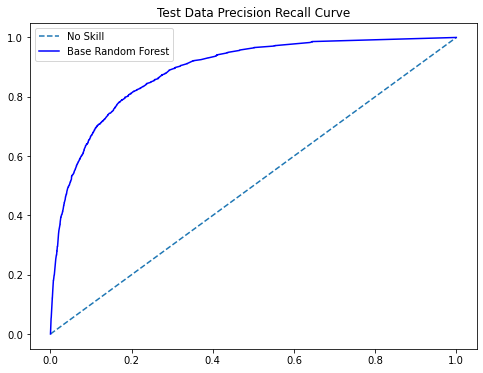

In [163]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# calculate roc curves
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# plot the roc curve for the model
plt.figure(figsize=(8,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, color ='blue', label='Base Random Forest')
plt.legend()
plt.title('Test Data Precision Recall Curve')

In [141]:
# Doing a Grid Search for Random Forest
rfc = RandomForestClassifier(random_state=42, n_jobs= -1)

# Defining the Grid
param_grid = { 
    'n_estimators': [50, 100, 500 ],
    'max_features': [2,4, 'sqrt', "auto","log2"],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_split':[3,4,5,6,7,8]
}



In [206]:
# Finding the Best Parameters
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring= 'roc_auc')
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'max_features': [2, 4, 'sqrt', 'auto', 'log2'],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 500]},
             scoring='roc_auc')

In [209]:
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=12, max_features='sqrt', min_samples_split=4,
                       n_estimators=500, random_state=100)

In [210]:
# Fitting the model again with the best parameters
rfc_best = RandomForestClassifier(max_depth=12, max_features='sqrt', min_samples_split=4, n_estimators=500, random_state=100)
rfc_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features='sqrt', min_samples_split=4,
                       n_estimators=500, random_state=100)

##### b) Use the fitted model to predict on test data.

In [214]:
best_train_pred = rfc_best.predict(X_train)
best_train_pred_prob = rfc_best.predict_proba(X_train)

best_test_pred = rfc_best.predict(X_test)
best_test_pred_prob = rfc_best.predict_proba(X_test)



It took 6.649506092071533 seconds.


##### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 

In [216]:
print(confusion_matrix(y_test, best_test_pred))
print(classification_report(y_test, best_test_pred))

[[7112  343]
 [1039 1275]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7455
           1       0.79      0.55      0.65      2314

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



##### d) Calculate the AUC score

In [217]:
test_rfc_best_roc_auc_score = roc_auc_score(y_test, rfc_best.predict_proba(X_test)[:, 1])
test_rfc_best_roc_auc_score

0.9126052483150124

In [218]:
precision, recall, _ = precision_recall_curve(y_test, rfc_best.predict_proba(X_test)[:, 1])
test_rfc_best_auc_score = auc(recall, precision)
test_rfc_best_auc_score

0.790559570068478

Since we have an imbalanced data thus using a Precision Recall score gives a better picture of our model 

Text(0.5, 1.0, 'Test Data Precision Recall Curve')

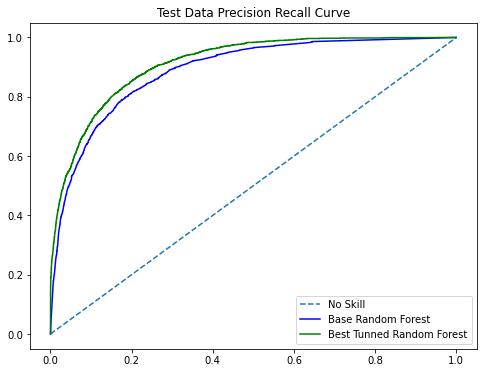

In [219]:
# calculate roc curves
rfc_best_fpr, rfc_best_tpr, _ = roc_curve(y_test, rfc_best.predict_proba(X_test)[:, 1])

# plot the roc curve for the model
plt.figure(figsize=(8,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, color ='blue', label='Base Random Forest')
plt.plot(rfc_best_fpr, rfc_best_tpr, color ='green', label='Best Tunned Random Forest')
plt.legend()
plt.title('Test Data Precision Recall Curve')

##### e) Identify the top 5 features

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 features in Random Forest')

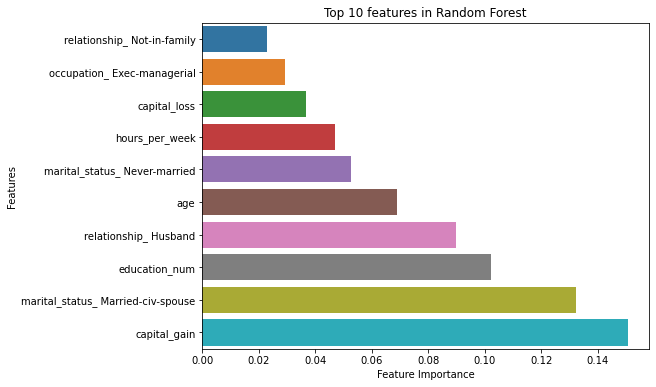

In [252]:
sorted_index_rfc = rfc_best.feature_importances_.argsort()[-10:]

plt.figure(figsize=(8,6))
sns.barplot(rfc_best.feature_importances_[sorted_index_rfc], X_train.columns[sorted_index_rfc])
plt.xlabel("Feature Importance")
plt.ylabel('Features')
plt.title('Top 10 features in Random Forest')

##### f) Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the RandomForest model happening?

In [221]:
print(confusion_matrix(y_train, best_train_pred))
print(classification_report(y_train, best_train_pred))

[[16612   653]
 [ 2293  3234]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     17265
           1       0.83      0.59      0.69      5527

    accuracy                           0.87     22792
   macro avg       0.86      0.77      0.80     22792
weighted avg       0.87      0.87      0.86     22792



In [222]:
train_rfc_best_roc_auc_score = roc_auc_score(y_train, rfc_best.predict_proba(X_train)[:, 1])
train_rfc_best_roc_auc_score

0.9350929441971176

In [223]:
precision, recall, _ = precision_recall_curve(y_train, rfc_best.predict_proba(X_train)[:, 1])
train_rfc_best_auc_score = auc(recall, precision)
train_rfc_best_auc_score

0.8381560823190298

In [224]:
# Creating a performance table for all the models
perf_summary = pd.DataFrame(index = ['Train_ROC_AUC_Score', 'Test_ROC_AUC_Score', 'Train_Precision_Recall_AUC_Score', 'Test_Precision_Recall_AUC_Score'])
perf_summary['Base_Random_Forest'] = np.round([train_base_rfc_roc_auc_score, test_base_rfc_roc_auc_score, train_base_rfc_auc_score, test_base_rfc_auc_score], decimals = 2)
perf_summary['Best_Random_Forest'] = np.round([train_rfc_best_roc_auc_score, test_rfc_best_roc_auc_score, train_rfc_best_auc_score, test_rfc_best_auc_score], decimals = 2)
perf_summary

,Base_Random_Forest,Best_Random_Forest
Train_ROC_AUC_Score,1.00,0.94
Test_ROC_AUC_Score,0.89,0.91
Train_Precision_Recall_AUC_Score,0.99,0.84
Test_Precision_Recall_AUC_Score,0.73,0.79


From above table we can see that the Base model was overfitting the training data as the ROC AUC score fell a lot as we moved from training to test data. The fall in Precision recall score is more.

But if we see the Tuned Random Forest then it does not overfit to the Training set because the fall in Train and Test accuracy is less now.

## 3. AdaBoost Classifier - GridSearch:

In [225]:
from sklearn.ensemble import AdaBoostClassifier

ada_base = AdaBoostClassifier()
ada_base.fit(X_train, y_train)

AdaBoostClassifier()

In [226]:
train_ada_base_pred = ada_base.predict(X_train)
train_ada_base_prob = ada_base.predict_proba(X_train)

test_ada_base_pred = ada_base.predict(X_test)
test_ada_base_prob = ada_base.predict_proba(X_test)

In [227]:
print(confusion_matrix(y_test, test_ada_base_pred))
print(classification_report(y_test, test_ada_base_pred))

[[7004  451]
 [ 868 1446]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7455
           1       0.76      0.62      0.69      2314

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [228]:
print(confusion_matrix(y_train, train_ada_base_pred))
print(classification_report(y_train, train_ada_base_pred))

[[16158  1107]
 [ 2092  3435]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     17265
           1       0.76      0.62      0.68      5527

    accuracy                           0.86     22792
   macro avg       0.82      0.78      0.80     22792
weighted avg       0.85      0.86      0.85     22792



In [229]:
test_ada_base_roc_auc_score = roc_auc_score(y_test, ada_base.predict_proba(X_test)[:, 1])
test_ada_base_roc_auc_score

0.9164925305216489

In [230]:
train_ada_base_roc_auc_score = roc_auc_score(y_train, ada_base.predict_proba(X_train)[:, 1])
train_ada_base_roc_auc_score

0.9176491248422627

In [231]:
precision, recall, _ = precision_recall_curve(y_test, ada_base.predict_proba(X_test)[:, 1])
test_ada_base_auc_score = auc(recall, precision)
test_ada_base_auc_score

0.8032184593732652

In [232]:
precision, recall, _ = precision_recall_curve(y_train, ada_base.predict_proba(X_train)[:, 1])
train_ada_base_auc_score = auc(recall, precision)
train_ada_base_auc_score

0.8050672143547735

Text(0.5, 1.0, 'Test Data Precision Recall Curve')

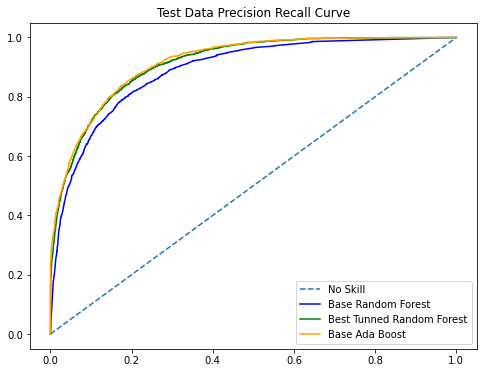

In [233]:
# calculate roc curves
ada_base_fpr, ada_base_tpr, _ = roc_curve(y_test, ada_base.predict_proba(X_test)[:, 1])

# plot the roc curve for the model
plt.figure(figsize=(8,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, color ='blue', label='Base Random Forest')
plt.plot(rfc_best_fpr, rfc_best_tpr, color ='green', label='Best Tunned Random Forest')
plt.plot(ada_base_fpr, ada_base_tpr, color ='orange', label='Base Ada Boost')
plt.legend()
plt.title('Test Data Precision Recall Curve')

In [234]:
perf_summary['Base_Ada_Boost'] = np.round([train_ada_base_roc_auc_score, test_ada_base_roc_auc_score, train_ada_base_auc_score, test_ada_base_auc_score], decimals = 2)
perf_summary

,Base_Random_Forest,Best_Random_Forest,Base_Ada_Boost
Train_ROC_AUC_Score,1.00,0.94,0.92
Test_ROC_AUC_Score,0.89,0.91,0.92
Train_Precision_Recall_AUC_Score,0.99,0.84,0.81
Test_Precision_Recall_AUC_Score,0.73,0.79,0.80


##### a) Use the AdaBoostClassifier along with the GridSearchCV tool

In [236]:
# Doing a Grid Search for Random Forest
ada = AdaBoostClassifier(random_state=42)

# Defining the Grid
param_grid = {"n_estimators": [100, 200, 300, 400], 
              "learning_rate": [0.2,0.4,0.6,0.8,1, 1.2]
             }

In [237]:
# Finding the Best Parameters
start = time.time()

CV_ada = GridSearchCV(estimator=ada, param_grid=param_grid, cv= 5, scoring= 'roc_auc')
CV_ada.fit(X_train, y_train)

print ('It took', time.time()-start, 'seconds.')

It took 769.2790853977203 seconds.


##### b) Use the best estimator from GridSearchCV to predict on test data. 

In [238]:
CV_ada.best_estimator_

AdaBoostClassifier(learning_rate=1.2, n_estimators=400, random_state=42)

In [239]:
# Fitting the model again with the best parameters
ada_best = AdaBoostClassifier(learning_rate=1.2, n_estimators=400, random_state=42)
ada_best.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1.2, n_estimators=400, random_state=42)

In [240]:
best_train_pred = ada_best.predict(X_train)
best_train_pred_prob = ada_best.predict_proba(X_train)

best_test_pred = ada_best.predict(X_test)
best_test_pred_prob = ada_best.predict_proba(X_test)

##### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 

In [241]:
print(confusion_matrix(y_test, best_test_pred))
print(classification_report(y_test, best_test_pred))

[[7008  447]
 [ 807 1507]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



##### d) Calculate the AUC score

In [242]:
test_ada_best_roc_auc_score = roc_auc_score(y_test, ada_best.predict_proba(X_test)[:, 1])
test_ada_best_roc_auc_score

0.9244122180504519

In [243]:
precision, recall, _ = precision_recall_curve(y_test, ada_best.predict_proba(X_test)[:, 1])
test_ada_best_auc_score = auc(recall, precision)
test_ada_best_auc_score

0.8204704677929369

Since we have an imbalanced data thus using a Precision Recall score gives a better picture of our model 

Text(0.5, 1.0, 'Test Data Precision Recall Curve')

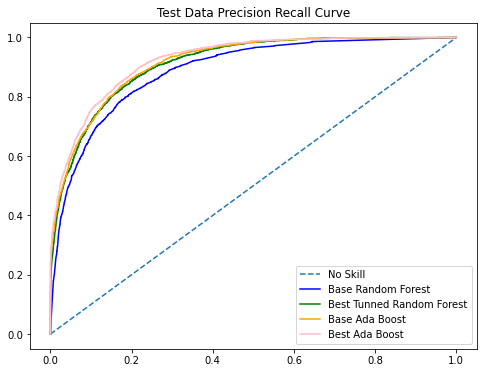

In [246]:
# calculate roc curves
ada_best_fpr, ada_best_tpr, _ = roc_curve(y_test, ada_best.predict_proba(X_test)[:, 1])

# plot the roc curve for the model
plt.figure(figsize=(8,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, color ='blue', label='Base Random Forest')
plt.plot(rfc_best_fpr, rfc_best_tpr, color ='green', label='Best Tunned Random Forest')
plt.plot(ada_base_fpr, ada_base_tpr, color ='orange', label='Base Ada Boost')
plt.plot(ada_best_fpr, ada_best_tpr, color ='pink', label='Best Ada Boost')
plt.legend()
plt.title('Test Data Precision Recall Curve')

##### e) Identify the top 5 features

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 features in Random Forest')

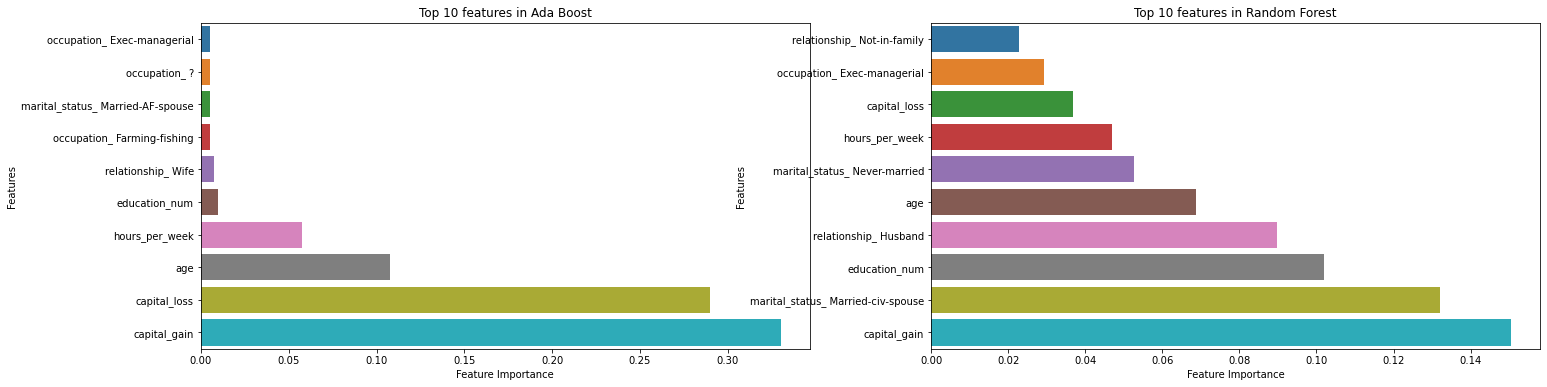

In [253]:
sorted_index_ada = ada_best.feature_importances_.argsort()[-10:]

plt.figure(figsize=(24,6))
plt.subplot(1,2,1)
sns.barplot(ada_best.feature_importances_[sorted_index_ada], X_train.columns[sorted_index_ada])
plt.xlabel("Feature Importance")
plt.ylabel('Features')
plt.title('Top 10 features in Ada Boost')


plt.subplot(1,2,2)
sns.barplot(rfc_best.feature_importances_[sorted_index_rfc], X_train.columns[sorted_index_rfc])
plt.xlabel("Feature Importance")
plt.ylabel('Features')
plt.title('Top 10 features in Random Forest')

We can see that there is a lot of difference between the top 10 features in both Random Forest and Ada Boost Classifier.

The top feature is similar in both the models i.e. Capital Gain

##### f) Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the Ada Boost Classifier happening?

In [254]:
print(confusion_matrix(y_train, best_train_pred))
print(classification_report(y_train, best_train_pred))

[[16247  1018]
 [ 1902  3625]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17265
           1       0.78      0.66      0.71      5527

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792



In [255]:
train_ada_best_roc_auc_score = roc_auc_score(y_train, ada_best.predict_proba(X_train)[:, 1])
train_ada_best_roc_auc_score

0.9320490658212577

In [256]:
precision, recall, _ = precision_recall_curve(y_train, ada_best.predict_proba(X_train)[:, 1])
train_ada_best_auc_score = auc(recall, precision)
train_ada_best_auc_score

0.8351961617784824

In [257]:
# Creating a performance table for all the models
perf_summary['Best_Ada_Boost_Classifier'] = np.round([train_ada_best_roc_auc_score, test_ada_best_roc_auc_score, train_ada_best_auc_score, test_ada_best_auc_score], decimals = 2)
perf_summary

,Base_Random_Forest,Best_Random_Forest,Base_Ada_Boost,Best_Ada_Boost_Classifier
Train_ROC_AUC_Score,1.00,0.94,0.92,0.93
Test_ROC_AUC_Score,0.89,0.91,0.92,0.92
Train_Precision_Recall_AUC_Score,0.99,0.84,0.81,0.84
Test_Precision_Recall_AUC_Score,0.73,0.79,0.80,0.82


From above table we can see that the Ada Boost Classifier is not overfitting the training data as there is not much difference between the training and test error. The ROC_AUC score and PRecision Recall Score is almost similar in both training set and test set.

## 4. Gradient Boosting Classifier - GridSearch:

##### a) Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:
n_estimators: 100,200, 300 & 400

learning_rate: choose 3 learning rates of your choice

max_depth: 1, 2 (you can try deeper, but remember part of the value of boosting stems from minimal complexity of trees)

In [266]:
# Doing a Grid Search for Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Defining the Grid
param_grid = {"loss":["deviance"],
              "learning_rate": [0.2,0.6,0.8],
              "max_depth":[1,2,3],
              "max_features":['auto', 'sqrt', 'log2'],
              "n_estimators":[10, 50, 100, 200, 300]}

In [267]:
# Finding the Best Parameters
start = time.time()

CV_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv= 5, scoring= 'roc_auc')
CV_gb.fit(X_train, y_train)

print ('It took', time.time()-start, 'seconds.')

It took 874.6186571121216 seconds.


##### b) Use the best estimator from GridSearchCV to predict on test data. 

In [268]:
CV_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, max_features='auto',
                           n_estimators=300, random_state=42)

In [239]:
# Fitting the model again with the best parameters
gb_best = AdaBoostClassifier(learning_rate=1.2, n_estimators=400, random_state=42)
gb_best.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1.2, n_estimators=400, random_state=42)

In [240]:
best_train_pred = gb_best.predict(X_train)
best_train_pred_prob = gb_best.predict_proba(X_train)

best_test_pred = gb_best.predict(X_test)
best_test_pred_prob = gb_best.predict_proba(X_test)

##### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 

In [241]:
print(confusion_matrix(y_test, best_test_pred))
print(classification_report(y_test, best_test_pred))

[[7008  447]
 [ 807 1507]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



##### d) Calculate the AUC score

In [242]:
test_gb_best_roc_auc_score = roc_auc_score(y_test, gb_best.predict_proba(X_test)[:, 1])
test_gb_best_roc_auc_score

0.9244122180504519

In [243]:
precision, recall, _ = precision_recall_curve(y_test, gb_best.predict_proba(X_test)[:, 1])
test_gb_best_auc_score = auc(recall, precision)
test_gb_best_auc_score

0.8204704677929369

Since we have an imbalanced data thus using a Precision Recall score gives a better picture of our model 

Text(0.5, 1.0, 'Test Data Precision Recall Curve')

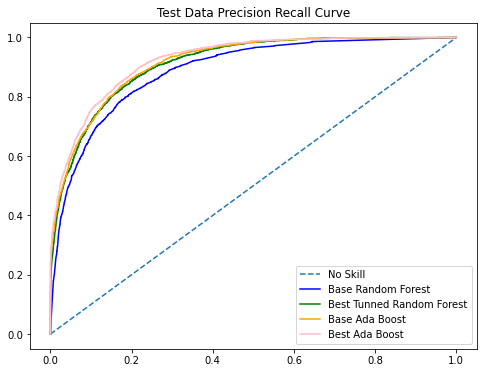

In [246]:
# calculate roc curves
gb_best_fpr, gb_best_tpr, _ = roc_curve(y_test, gb_best.predict_proba(X_test)[:, 1])

# plot the roc curve for the model
plt.figure(figsize=(8,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, color ='blue', label='Base Random Forest')
plt.plot(rfc_best_fpr, rfc_best_tpr, color ='green', label='Best Tunned Random Forest')
plt.plot(ada_base_fpr, ada_base_tpr, color ='orange', label='Base Ada Boost')
plt.plot(ada_best_fpr, ada_best_tpr, color ='pink', label='Best Ada Boost')
plt.plot(gb_best_fpr, gb_best_tpr, color ='blue', label='Best Gradient Boosting')
plt.legend()
plt.title('Test Data Precision Recall Curve')

##### e) Identify the top 5 features

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 features in Random Forest')

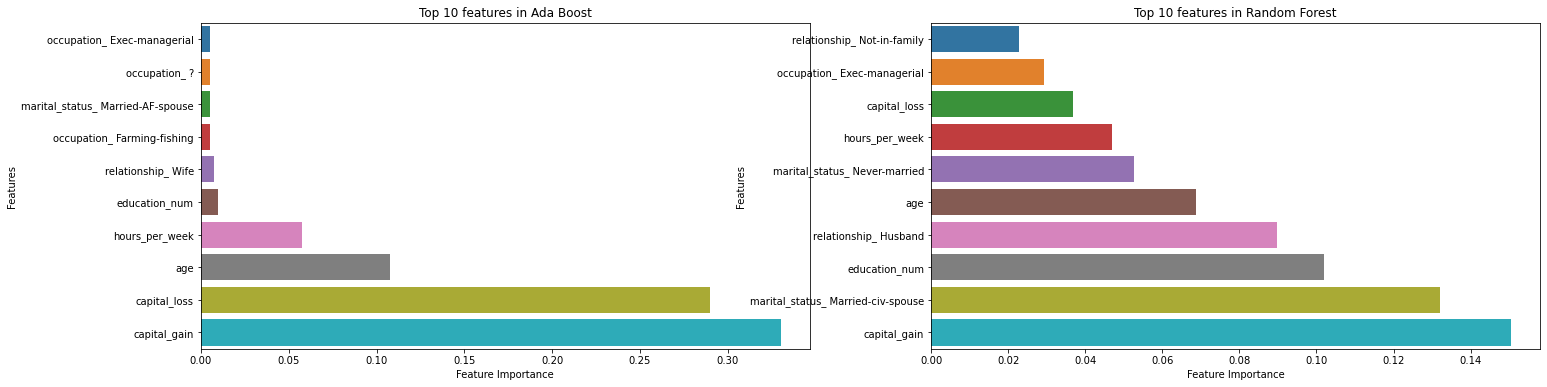

In [253]:
sorted_index_gb = gb_best.feature_importances_.argsort()[-10:]

plt.figure(figsize=(24,6))
plt.subplot(2,2,1)
sns.barplot(ada_best.feature_importances_[sorted_index_ada], X_train.columns[sorted_index_ada])
plt.xlabel("Feature Importance")
plt.ylabel('Features')
plt.title('Top 10 features in Ada Boost')


plt.subplot(2,2,2)
sns.barplot(rfc_best.feature_importances_[sorted_index_rfc], X_train.columns[sorted_index_rfc])
plt.xlabel("Feature Importance")
plt.ylabel('Features')
plt.title('Top 10 features in Random Forest')

plt.subplot(2,2,3)
sns.barplot(gb_best.feature_importances_[sorted_index_gb], X_train.columns[sorted_index_gb])
plt.xlabel("Feature Importance")
plt.ylabel('Features')
plt.title('Top 10 features in Gradient Boost')

We can see that there is a lot of difference between the top 10 features in both Random Forest and Ada Boost Classifier.

The top feature is similar in both the models i.e. Capital Gain

##### f) Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the Gradient Boost Classifier happening?

In [254]:
print(confusion_matrix(y_train, best_train_pred))
print(classification_report(y_train, best_train_pred))

[[16247  1018]
 [ 1902  3625]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17265
           1       0.78      0.66      0.71      5527

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792



In [255]:
train_gb_best_roc_auc_score = roc_auc_score(y_train, gb_best.predict_proba(X_train)[:, 1])
train_gb_best_roc_auc_score

0.9320490658212577

In [256]:
precision, recall, _ = precision_recall_curve(y_train, gb_best.predict_proba(X_train)[:, 1])
train_gb_best_auc_score = auc(recall, precision)
train_gb_best_auc_score

0.8351961617784824

In [257]:
# Creating a performance table for all the models
perf_summary['Best_Gradient_Boost_Classifier'] = np.round([train_gb_best_roc_auc_score, test_gb_best_roc_auc_score, train_gb_best_auc_score, test_gb_best_auc_score], 
                                                          decimals = 2)
perf_summary

,Base_Random_Forest,Best_Random_Forest,Base_Ada_Boost,Best_Ada_Boost_Classifier
Train_ROC_AUC_Score,1.00,0.94,0.92,0.93
Test_ROC_AUC_Score,0.89,0.91,0.92,0.92
Train_Precision_Recall_AUC_Score,0.99,0.84,0.81,0.84
Test_Precision_Recall_AUC_Score,0.73,0.79,0.80,0.82


From above table we can see that the Ada Boost Classifier is not overfitting the training data as there is not much difference between the training and test error. The ROC_AUC score and PRecision Recall Score is almost similar in both training set and test set.

In [283]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(random_state = 1001)

params = {'n_estimators' : list(range(100,1050,50)),
        'learning_rate' : list(np.arange(0.1, 1.7, 0.1)),
        'gamma': list(np.arange(0, 5.25, 0.25)),
        'max_depth': [1,2]
        }

In [288]:
start = time.time()
random_search = RandomizedSearchCV(xgb, param_distributions = params, scoring = 'roc_auc', n_jobs = -1, 
                                   cv = 5, random_state=1001 )

random_search.fit(X_train, y_train)
print ('It took', time.time()-start, 'seconds.')

C:\Users\aksha\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
It took 113.60158705711365 seconds.


In [289]:
random_search.best_params_

{'n_estimators': 700,
 'max_depth': 2,
 'learning_rate': 0.7000000000000001,
 'gamma': 0.25}